In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
N = 5 # board dimensions

# plot configuration
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = 8, 5

In [3]:
data = pd.read_csv('timing.csv') # in seconds
bot1_time = data['MCTS'].values
bot2_time = data['Alpha-beta'].values
data

,MCTS,Alpha-beta
0,1.500141,17.736271
1,1.484531,14.001453
2,1.484531,11.048068
3,1.468900,7.891459
4,1.453278,11.251163
5,1.437651,5.860018
6,1.531385,6.703832
7,1.531436,1.562640
8,1.375146,0.703227
9,1.390745,0.187519


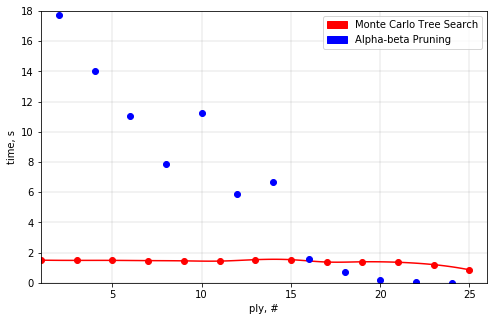

In [4]:
def cubic_spline(points, c):
    tck,u = interpolate.splprep(points.transpose(), s=0)
    unew = np.arange(0, 1.01, 0.01)
    out = interpolate.splev(unew, tck)
    
    plt.plot(out[0], out[1], color=c)
    plt.plot(points[:,0], points[:,1], 'o' + c)


fig = plt.figure()

bot1_points = np.column_stack((np.arange(1, 2 * len(bot1_time), 2), bot1_time))
cubic_spline(bot1_points, 'r')

bot2_points = np.column_stack((np.arange(2, 2 * len(bot2_time)+1, 2), bot2_time))
cubic_spline(bot2_points, 'b')

bot1_patch = mpatches.Patch(color='r', label='Monte Carlo Tree Search')
bot2_patch = mpatches.Patch(color='b', label='Alpha-beta Pruning')
plt.legend(handles=[bot1_patch, bot2_patch])

plt.xlabel('ply, #')
plt.ylabel('time, s')

plt.xlim([1, len(bot1_time) + len(bot2_time)])
plt.ylim([0, int(max(max(bot1_time), max(bot2_time)))+1])

plt.grid(color='grey', linestyle='-', linewidth=0.2)
plt.savefig('1.png')
plt.show()